In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train_dt=pd.read_csv("trainKNN.txt",header=None,sep=',',names=['Idno','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Typeofglass'])
train_dt

,Idno,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [10]:
test_dt=pd.read_csv("testKNN.txt",header=None,sep=',',names=['Idno','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Typeofglass'])
test_dt

,Idno,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [11]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idno         196 non-null    int64  
 1   RI           196 non-null    float64
 2   Na           196 non-null    float64
 3   Mg           196 non-null    float64
 4   Al           196 non-null    float64
 5   Si           196 non-null    float64
 6   K            196 non-null    float64
 7   Ca           196 non-null    float64
 8   Ba           196 non-null    float64
 9   Fe           196 non-null    float64
 10  Typeofglass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [14]:
train_dt.isnull().sum()

Idno           0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
Typeofglass    0
dtype: int64

Text(0.5, 1.0, 'Type Of Glass Count')

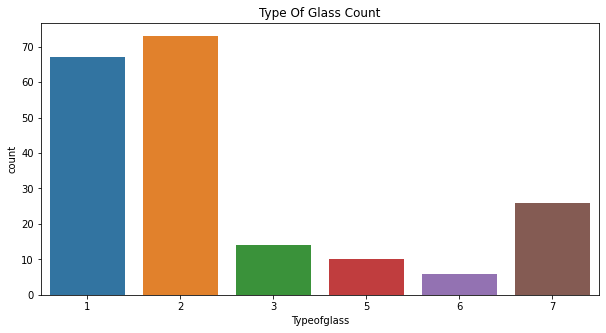

In [15]:
#EDA
#EDA 
plt.figure(figsize=(10,5))
sns.countplot(data=train_dt,x=train_dt['Typeofglass'])
plt.title("Type Of Glass Count")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 8 Text major ticklabel objects>)

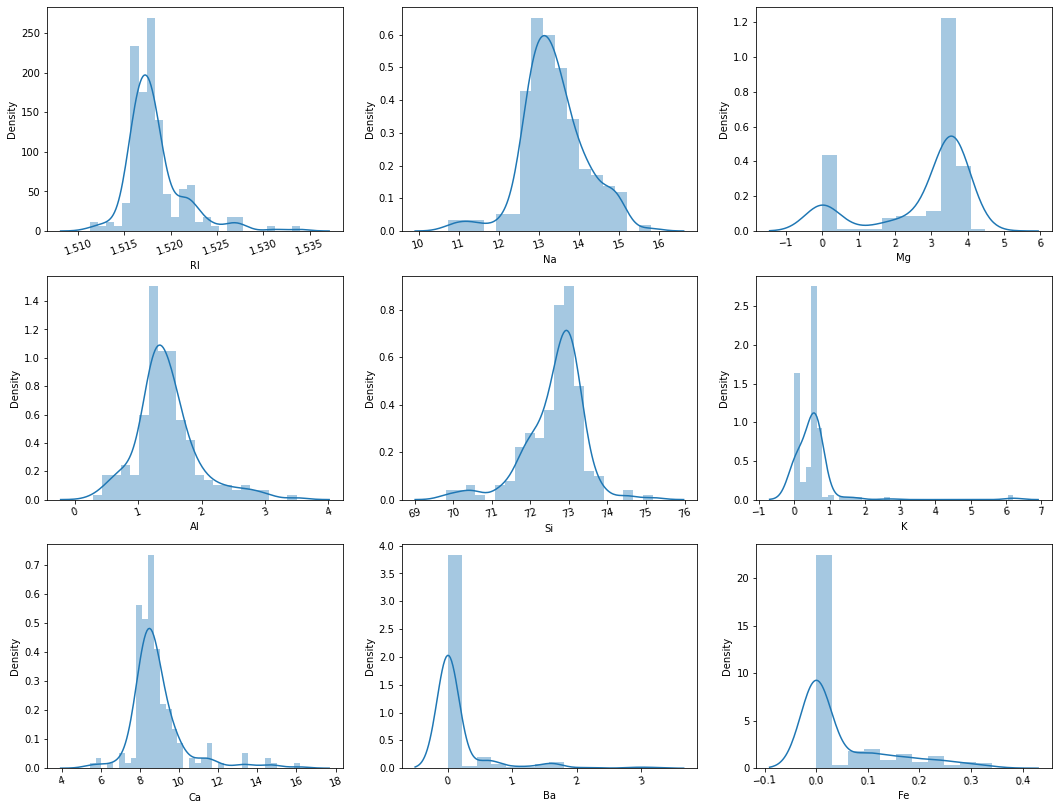

In [20]:
plt.figure(figsize=(18,14))
plt.subplot(331)
sns.distplot(train_dt["RI"])
plt.xticks(rotation=19)
plt.subplot(332)
sns.distplot(train_dt["Na"])
plt.xticks(rotation=15)
plt.subplot(333)
sns.distplot(train_dt["Mg"])
plt.xticks(rotation=5)
plt.subplot(334)
sns.distplot(train_dt["Al"])
plt.xticks(rotation=19)
plt.subplot(335)
sns.distplot(train_dt["Si"])
plt.xticks(rotation=15)
plt.subplot(336)
sns.distplot(train_dt["K"])
plt.xticks(rotation=5)
plt.subplot(337)
sns.distplot(train_dt["Ca"])
plt.xticks(rotation=19)
plt.subplot(338)
sns.distplot(train_dt["Ba"])
plt.xticks(rotation=15)
plt.subplot(339)
sns.distplot(train_dt["Fe"])
plt.xticks(rotation=5)

In [26]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
x_train = train_dt.drop(columns=['Typeofglass','Idno'],axis=1)
y_train = train_dt['Typeofglass']
x_test = test_dt.drop(columns=['Typeofglass','Idno'],axis=1)
y_test = test_dt['Typeofglass']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [43]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  
eu_pred = classifier.predict(x_test)

In [45]:
eu_score = accuracy_score(y_test,eu_pred)
eu_score

0.6111111111111112

In [46]:
classifier.score(x_test,y_test)*100

61.111111111111114

In [47]:
print(classification_report(y_test,eu_pred))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.56        18
weighted avg       0.61      0.61      0.56        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='manhattan')  
classifier.fit(x_train, y_train) 
manhat_pred = classifier.predict(x_test)

In [49]:
manhat_score= accuracy_score(y_test,manhat_pred)
manhat_score

0.6111111111111112

In [50]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.58      0.61      0.57        18
weighted avg       0.58      0.61      0.57        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
